In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train/255
x_test = x_test/255

In [4]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(128,activation = 'relu'),
    Dense(64,activation = 'relu'),
    Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [6]:
model.fit(x_train,y_train,epochs = 5,validation_split = 0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8769 - loss: 0.4434 - val_accuracy: 0.9670 - val_loss: 0.1189
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9651 - loss: 0.1137 - val_accuracy: 0.9725 - val_loss: 0.0941
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9780 - loss: 0.0717 - val_accuracy: 0.9745 - val_loss: 0.0882
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9829 - loss: 0.0516 - val_accuracy: 0.9762 - val_loss: 0.0829
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9873 - loss: 0.0404 - val_accuracy: 0.9732 - val_loss: 0.0919


In [7]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"{test_acc*100:.2f}%")
pred = model.predict(x_test[:10])
pred_labels = np.argmax(pred,axis = 1)
actual = y_test[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9672 - loss: 0.1119
97.14%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


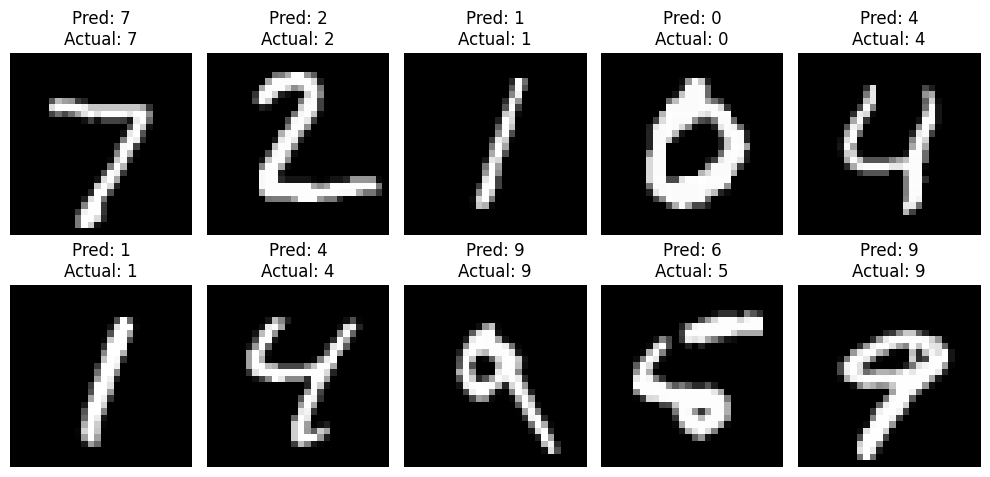

In [8]:
plt.figure(figsize=(10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}\nActual: {actual[i]}")
    plt.axis('off')

plt.tight_layout()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.97      1.00      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.99      0.97      1010
           4       0.92      0.99      0.95       982
           5       0.99      0.97      0.98       892
           6       0.99      0.96      0.97       958
           7       0.99      0.96      0.97      1028
           8       0.98      0.95      0.97       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



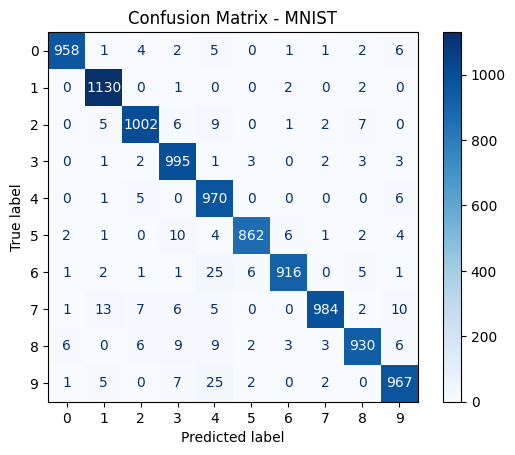

In [11]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - MNIST")
plt.show()